<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/Classification_Metrics_Portuguese_Banking_Institution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics

**Task**

The data has information about direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The goal is to predict if the client will subscribe (yes: 1 or no: 0) to a term deposit (the target column is called 'y_yes' in this csv).

The task is to build a logistic regression model to predict whether or not a client will subscribe. Tune the hyperparameters to get the best model possible. Then, calculate the following classification metrics:

Metrics to calculate:

*   Accuracy
*   Sensitivity
*   Specificity
*   AUC ROC
*   Additionally, plot the ROC.

After completing the task, answer the following questions:

1. Which metric is going to be best to evaluate your classification model for this dataset and why? Hint: think about what each metric means in this specific scenario. What metric is going to help the bank the most?
2. Compare your model's accuracy with the baseline model. Do you see any problems here?
3. What are other ways you could improve this model?

**Classification Evaluation Metrics**


**Metric** | **Formula** | **Interpretation**
--- | --- | --- 
**Accuracy** | TP + TN/ (TP + TN + FP + FN)| Overall performance of model
**Precision** | TP/ (TP + FP) | How accurate the positive predictions are
**Sensitivity** | TP / (TP + FN) | Coverage of actual positive sample
**Specificity** | TN / (TN + FP) | Coverage of actual negative sample

**ROC and AUC**

The receiver operating curve (ROC) is the plot of the True Positive Rate (TPR) versus the False Positive Rate (FRP) by varying the threshold. 

**Metric** | **Formula** | **Equivalent**
--- | --- | --- 
**True Positive Rate (TPR)** | TP/ (TP + FN) | Sensitivity
**False Positive Rate (FPR)** | FP/ (TN + FP) | 1 minus Specificity


AUC - The area below the ROC curve

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Models/Classification/Logistic Regression/bank_modified.csv')
data.head().T

,0,1,2,3,4
age,30,33,35,30,59
balance,1787,4789,1350,1476,0
duration,79,220,185,199,226
campaign,1,1,1,4,1
pdays,-1,339,330,-1,-1
previous,0,4,1,0,0
job_blue-collar,0,0,0,0,1
job_entrepreneur,0,0,0,0,0
job_housemaid,0,0,0,0,0
job_management,0,0,1,1,0


In [ ]:
# list of numerical features
num_col = []
for x in data.dtypes.index:
  if data.dtypes[x] == 'float64' or 'int64':
      num_col.append(x)
num_col
# num_col review
for col in num_col:
  print(col)
  print(data[col].value_counts())
  print()

age
34    231
32    224
31    199
36    188
33    186
     ... 
76      2
84      1
81      1
86      1
87      1
Name: age, Length: 67, dtype: int64

balance
0       357
2        24
1        15
4        13
23       11
       ... 
3472      1
5527      1
1433      1
1445      1
4094      1
Name: balance, Length: 2353, dtype: int64

duration
123     27
104     25
119     23
106     22
77      22
        ..
1149     1
1165     1
1173     1
1225     1
4        1
Name: duration, Length: 875, dtype: int64

campaign
1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
28       3
24       3
20       3
19       3
21       2
23       2
22       2
32       2
29       1
44       1
30       1
50       1
31       1
Name: campaign, dtype: int64

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 222       1
 210 

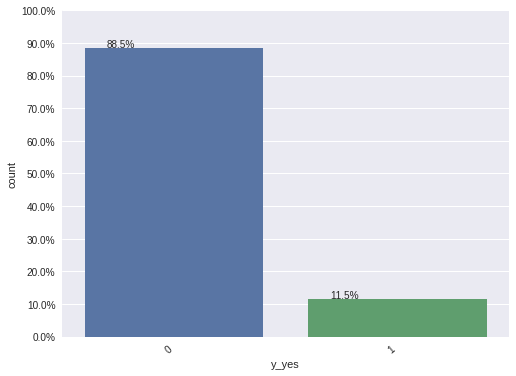

In [ ]:
# y_yes: 'no' = 4000; 'yes' = 521
plt.figure(figsize=(8,6))
Y = data["y_yes"]
total = len(Y)*1.
ax=sns.countplot(x="y_yes", data=data)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show();

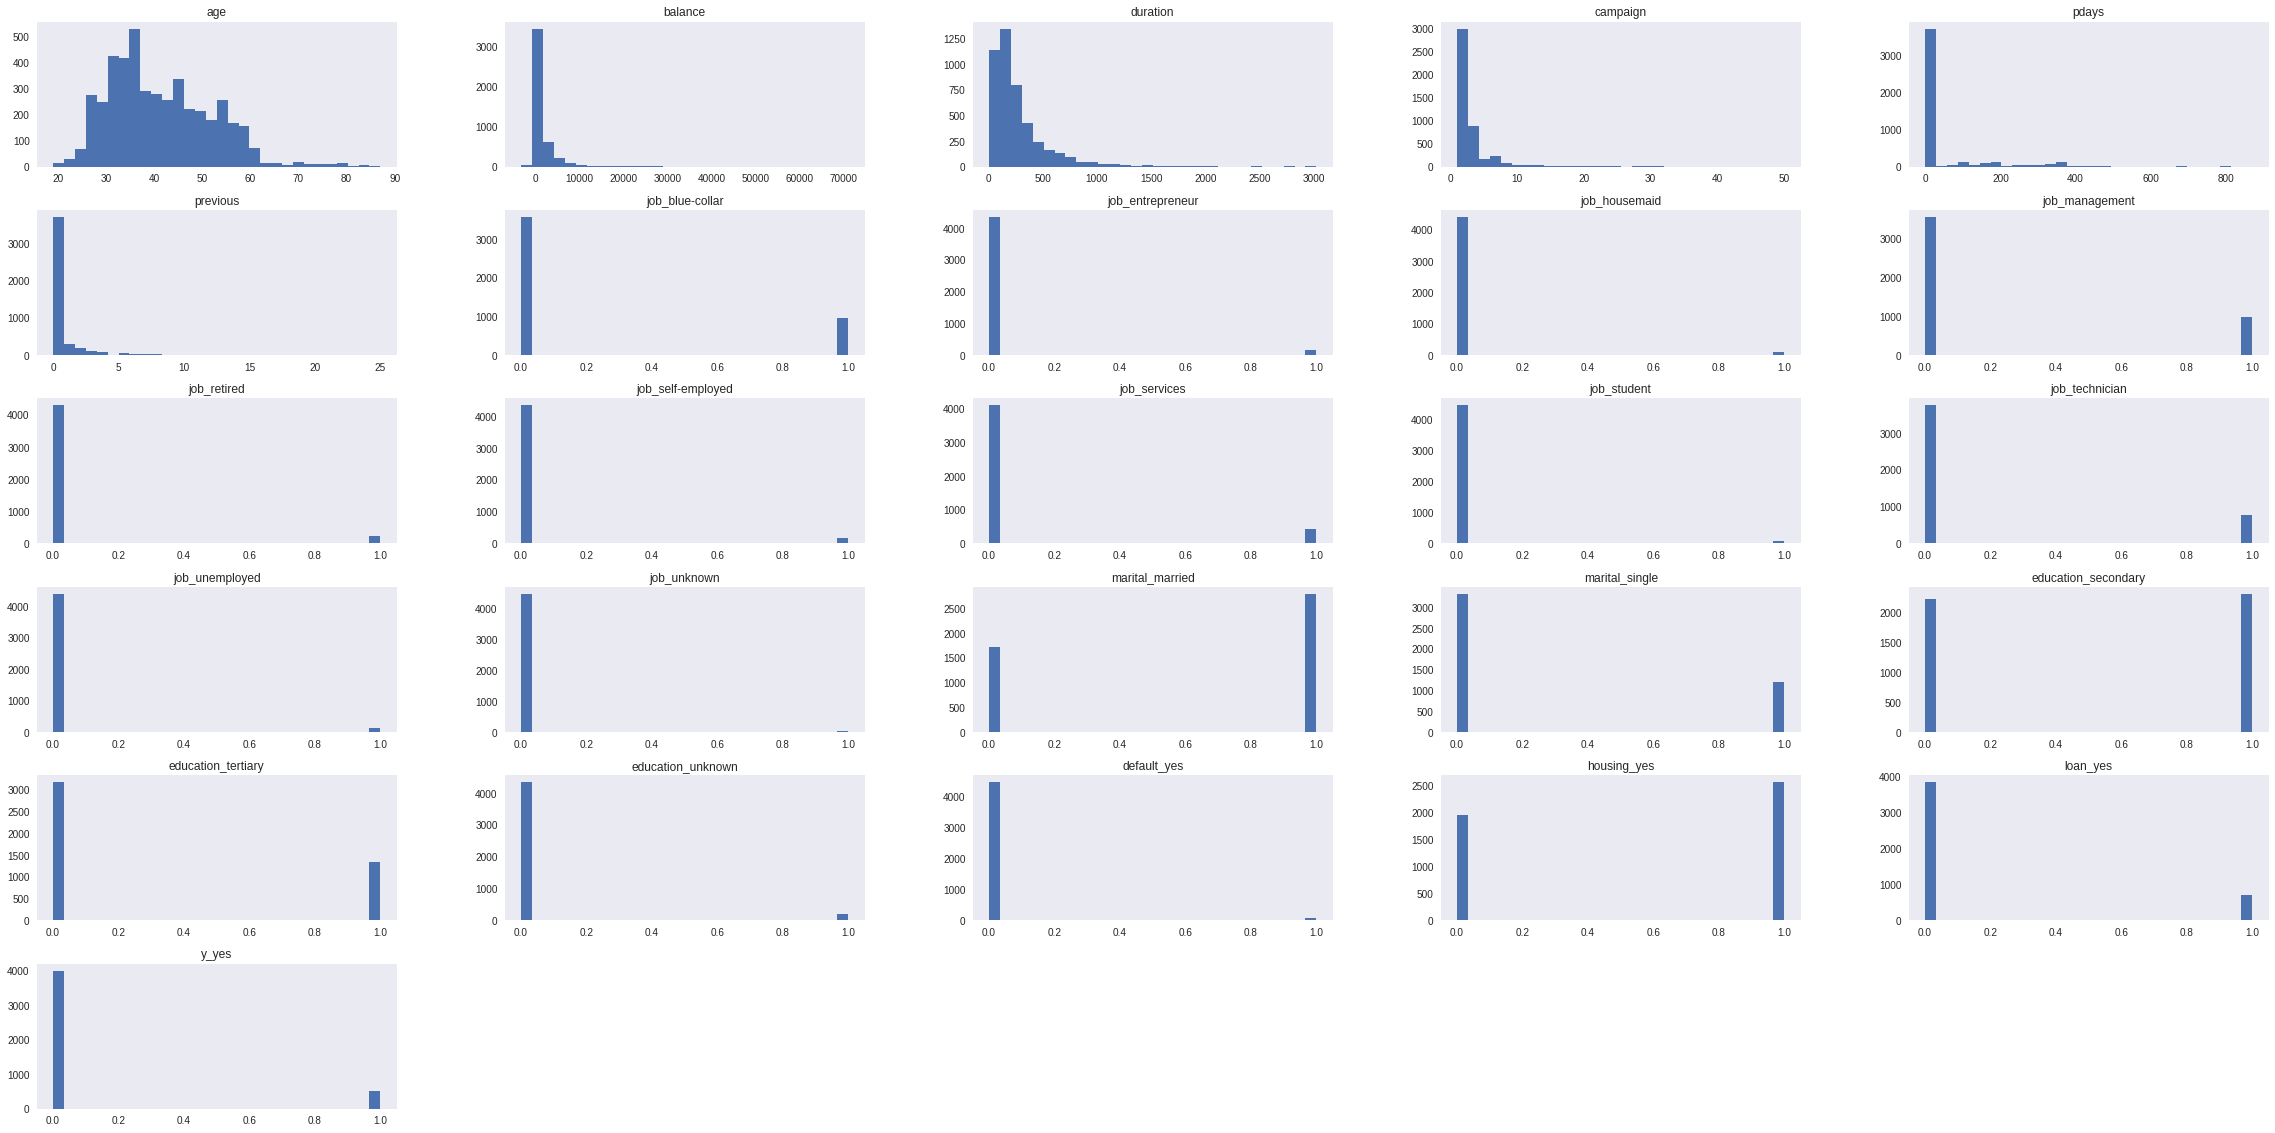

In [ ]:
plt.style.use('seaborn')
data.hist(figsize=(40,20), grid=False, bins = 30);

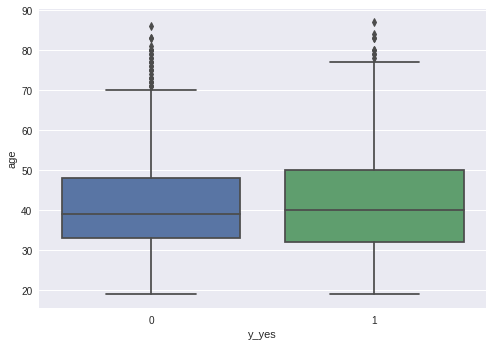

In [ ]:
sns.boxplot(data=data, x='y_yes', y='age')
plt.show();

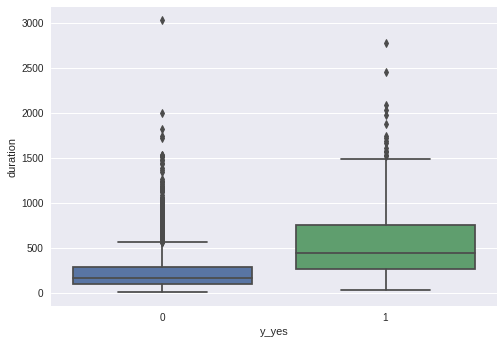

In [ ]:
sns.boxplot(data=data, x='y_yes', y='duration')
plt.show();

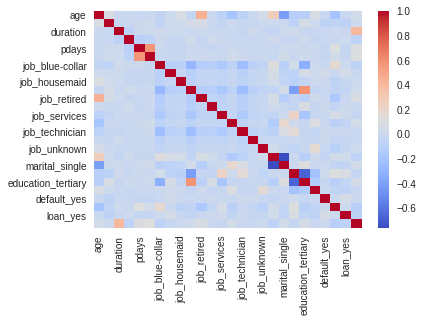

In [ ]:
%matplotlib inline
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm');

In [ ]:
X = data.drop(columns=['y_yes'])
print('Shape of X:', X.shape)
y = data.y_yes
print('Shape of y:', y.shape)

Shape of X: (4521, 25)
Shape of y: (4521,)


In [ ]:
# Instantiating a logisitic regression model
logreg = LogisticRegression(C=750)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print('Shape of predictions:', predictions.shape)
print(' ')
print(classification_report(y_test,predictions))

Shape of predictions: (1131,)
 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1004
           1       0.59      0.21      0.31       127

    accuracy                           0.89      1131
   macro avg       0.75      0.60      0.63      1131
weighted avg       0.87      0.89      0.87      1131



Confusion Matrix
 
                 Predicted Positive  Predicted Negative
Actual Positive                 985                  19
Actual Negative                 100                  27
 
TP =  985
TN =  27
FP =  100
FN =  19
 
Classification Evaluation Metrics
 
Accuracy score: 0.8947833775419982
Sensitivity score: 0.9810756972111554
Specificity score: 0.2125984251968504
AUC score: 0.5968370612040029
Training AUC: 0.8589244203777626
Testing AUC: 0.8762352166138596
 


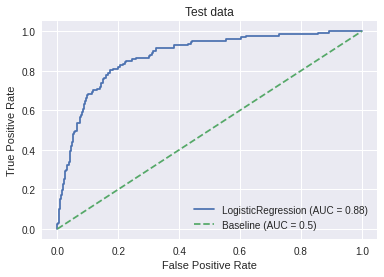

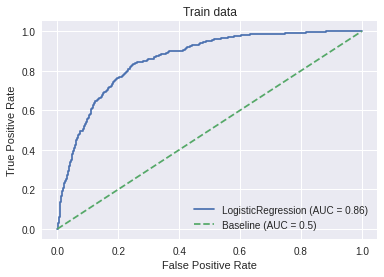

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Positive', 'Predicted Negative'],
            index = ['Actual Positive', 'Actual Negative'])
print('Confusion Matrix')
print(' ')
print(cm_df)
print(' ')
TP = 985
TN = 27
FP = 100
FN = 19

print('TP = ', TP)
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print(' ')
print('Classification Evaluation Metrics')
print(' ')
print('Accuracy score:', accuracy_score(y_test, predictions))
print('Sensitivity score:', TP/(FN+TP))
print('Specificity score:', TN/(TN+FP))
print('AUC score:', roc_auc_score(y_test, predictions))
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')
print(' ')

plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.title('Test data')
plt.legend();

plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.title('Train data')
plt.legend();

1. Which metric is going to be best to evaluate your classification model for this dataset and why? Hint: think about what each metric means in this specific scenario. What metric is going to help the bank the most?
        Sensitivity is the best classification metric to present to the bank.
        This metric shows what proportion of the actual positives were identified correctly.
        This will provide the bank with insight to new client projections.

2. Compare your model's accuracy with the baseline model. Do you see any problems here?
       Baseline model: 'no' = 88.5%; 'yes' = 11.5%
       Accuracy score: 89.5%
       The ratio of the two class labels ('no' and 'yes') is skewed with a bias towards the 'no' category. 
       This dataset imbalance is resulting in an unreliable accuracy score.



3. What are other ways you could improve this model?
       Remove 'duration' feature. This value is not known before a call is
       performed and should be removed from the list of features to predict.  

# Citations

1. https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9
2. https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks
3. https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
4. https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c